**Exercise 11.11**.  Simulate 100 pairs of $(X_t, Y_t)$ from the model of Equation (11.3.1) on page 261 with $d = 3$, $β_0 = 0$, and $β_1 = 1$.  Use $\sigma_X = 2$ and $\sigma_e = 1$.  Display and interpret the sample CCF between these two series.

**Solution**.  The model of Equation (11.3.1) is

$$ Y_t = \beta_0 + \beta_1 X_{t - d} + e_t $$

where $\{X_t\}$ are independent, identically distributed random variables with variance $\sigma_X$ and the errors $\{ e_t \}$ are also white noise with variance $\sigma_e^2$ and are independent of the $X$'s.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(123456)

n = 100
sigma_e = 1
sigma_X = 2
beta_0 = 0
beta_1 = 1
d = 3

X_t = np.random.normal(scale=sigma_X, size=n+d)
e_t = np.random.normal(scale=sigma_e, size=n)

Y_t = beta_0 + beta_1 * X_t[d:] + e_t

In [3]:
%%capture
%run plot_ccf.py

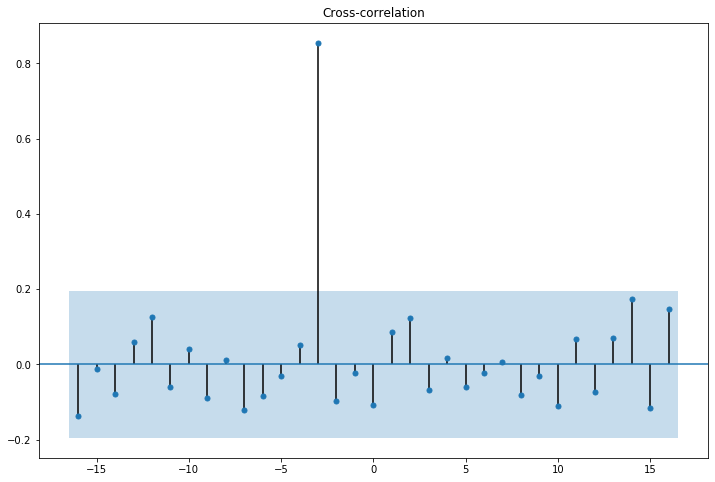

In [4]:
plt.figure(figsize=(12, 8))
plot_ccf(Y_t, X_t[:100], ax=plt.gca(), lags=16)
plt.show()

The most statistically significant cross-correlation occurs at lag -3.  This coincides with the theoretical analysis -- all cross-correlations should be zero, other than $\rho_{-3}(X, Y) = 2 / \sqrt{4 + 1} \approx 0.894$.

**Exercise 11.12**.  Show that when the $X$ and $Y $are independent AR(1) time series with parameters $\phi_X$ and $\phi_Y$, respectively, Equation (11.3.5) on page 262 reduces to give Equation (11.3.6).

**Solution**.  Equation (11.3.5) states that, for stationary and independent processes $X$ and $Y$, the variance of $\sqrt{n} r_k(X, Y)$ is approximately

$$ 1 + 2\sum_{k=1}^\infty \rho_k(X) \rho_k(Y) \tag{11.3.5} $$

If $X$ and $Y$ are AR(1) processes, then $\rho_k(X) = \phi_X^k$ and $\rho_k(Y) = \phi_Y^k$, so the equation above reduces to an infinite geometric sum

$$ 1 + 2 \sum_{k=1}^\infty (\phi_X \phi_Y)^k = 1 + \frac{2 \phi_X \phi_Y}{1 - \phi_X \phi_Y} = \frac{1 + \phi_X \phi_Y}{1 - \phi_X \phi_Y} $$

therefore, the variance of $r_k(X, Y)$ is approximately

$$ \frac{1 + \phi_X \phi_Y}{n (1 - \phi_X \phi_Y)} \tag{13.5.6} $$

which is our result.

**Exercise 11.13**.  Show that for the process defined by Equation (11.4.5) on page 266, the cross-correlation between $\tilde{X}$ and $\tilde{Y}$ at lag $k$ is given by $\beta_{-k}(\sigma_\tilde{X} / \sigma_\tilde{Y})$.

**Solution**.  Equation (11.4.5) defines

$$ \tilde{Y}_t = \sum_k \beta_k \tilde{X}_{t - k} + \tilde{Z}_t \tag{11.4.5} $$

Therefore, the covariance at lag $\ell$ is

$$ 
\begin{align}
\text{Cov}[\tilde{X}_t, \tilde{Y}_{t - \ell}] &= \text{Cov}\left[\tilde{X}_t, \sum_k \beta_k \tilde{X}_{t - k} + \tilde{Z}_t\right]\\
&= \beta_{-\ell} \text{Cov}[\tilde{X}_t, \tilde{X}_t] \\
&= \beta_{-\ell} \sigma_\tilde{X}^2
\end{align}
$$

and so the correlation at lag $k$ is

$$ 
\text{Corr}[\tilde{X}_t, \tilde{Y}_{t - k}] 
= \frac{\text{Cov}[\tilde{X}_t, \tilde{Y}_{t - k}]}{\sqrt{\text{Var}[\tilde{X}_t] \text{Var}[\tilde{Y}_{t - k}]}}
= \beta_{-k} \frac{\sigma_\tilde{X}^2}{\sigma_\tilde{X} \sigma_\tilde{Y}}
= \beta_{-k} \frac{\sigma_\tilde{X}}{\sigma_\tilde{Y}}
$$

**Exercise 11.14**.  Simulate an AR time series with $\phi = 0.7$, $\mu = 0$, $\sigma_e = 1$, and of length $n = 48$.  Plot the time series, and inspect the sample ACF and PACF of the series.

**(a)** Now add a step function response of $\omega = 1$ unit height at time $t = 36$ to the simulated series.  The series now has a theoretical mean of zero from $t =$ 1 to 35 and a mean of 1 from $t = 36$ on.  Plot the new time series and calculate the
sample ACF and PACF for the new series.  Compare these with the results for the original series.

**(b)** Repeat part (a) but with an impulse response at time $t = 36$ of unit height, $ω = 1$. Plot the new time series, and calculate the sample ACF and PACF for the new series.  Compare these with the results for the original series.  See if you can detect the additive outlier at time $t = 36$ assuming that you do not know where the outlier might occur.

**Solution**.

In [5]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [6]:
np.random.seed(0)

Y = generate_arima(phi=0.7, n=48)

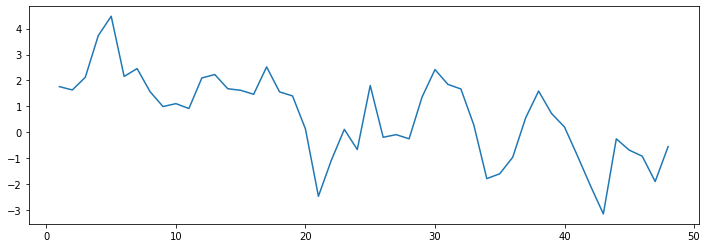

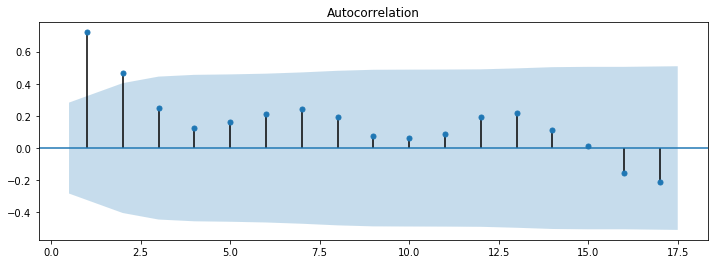

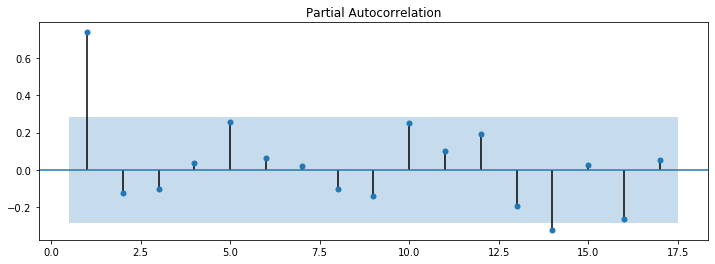

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y) + 1), Y)
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Y, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(Y, ax=plt.gca(), zero=False)
plt.show()

PACF suggests an AR(1) process.

**(a)**

In [8]:
Ya = Y.copy()
Ya[35:] += 1

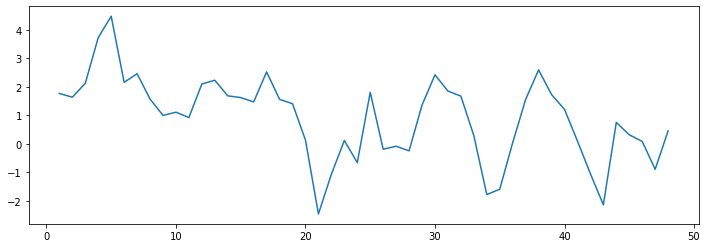

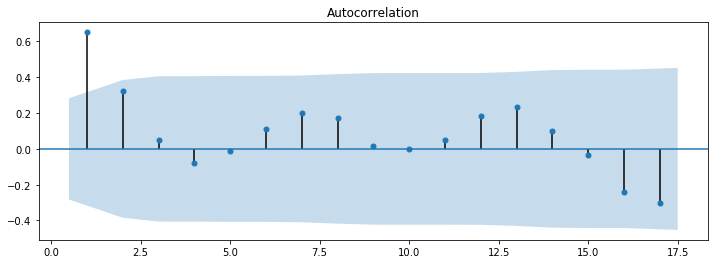

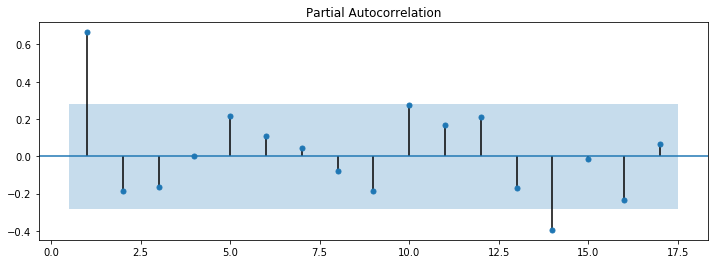

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y) + 1), Ya)
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Ya, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(Ya, ax=plt.gca(), zero=False)
plt.show()

Results look very similar to the original results.

**(b)**

In [10]:
Yb = Y.copy()
Ya[35] += 1

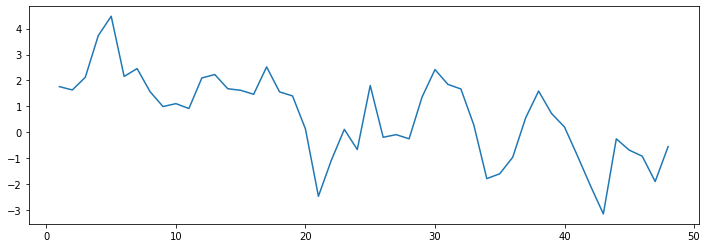

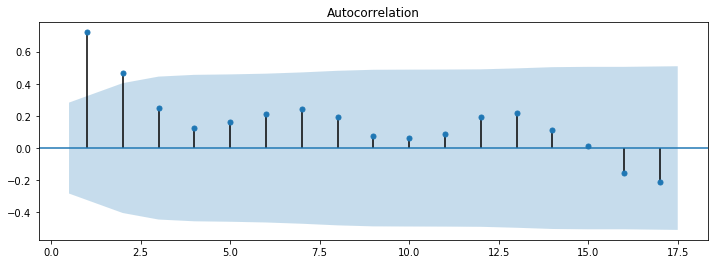

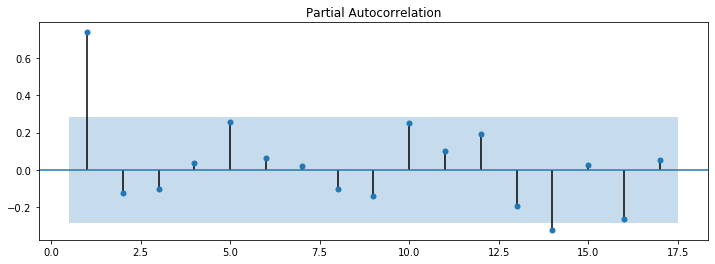

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y) + 1), Yb)
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Yb, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(Yb, ax=plt.gca(), zero=False)
plt.show()

Results still look very similar to the original series.

**Exercise 11.15**.  Consider the air passenger miles time series discussed in this chapter.  The file is named `airmiles`.  Use only the preintervention data (that is, data prior to September 2001) for this exercise.

**(a)** Verify that the sample ACF for the twice differenced series of the logarithms of the preintervention data is as shown in Exhibit 11.5 on page 255.

**(b)** The plot created in part (a) suggests an ARIMA$(0,1,1)\times(0,1,0)_{12}$. Fit this model and assess its adequacy. In particular, verify that additive outliers are detected in December 1996, January 1997, and December 2002.

**(c)** Now fit an ARIMA$(0,1,1)\times(0,1,0)_{12}$ + three outliers model and assess its adequacy.

**(d)** Finally, fit an ARIMA$(0,1,1)\times(0,1,1)_{12}$ + three outliers model and assess its adequacy.

**Solution**.

In [12]:
data = pd.read_csv('../data/airmiles.dat')
data['date'] = pd.date_range('1996-01', periods=len(data), freq='M')
Y = data[data['date'] < '2001-09']['airmiles']

**(a)**

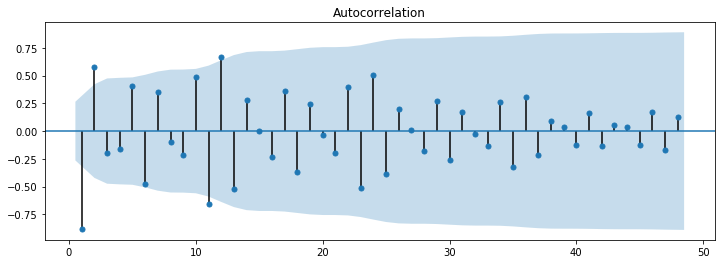

In [13]:
Z = np.diff(np.log(Y))
W = np.diff(Z, n=12)

plt.figure(figsize=(12, 4))
plot_acf(W, ax=plt.gca(), zero=False, lags=48)
plt.show()

**(b)**

In [14]:
model = ARIMA(np.log(Y), order=(0, 1, 1), seasonal_order=(0, 1, 0, 12)).fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          airmiles   No. Observations:                   68
Model:             ARIMA(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 101.978
Date:                           Sun, 17 May 2020   AIC                           -199.956
Time:                                   19:24:46   BIC                           -195.942
Sample:                                        0   HQIC                          -198.404
                                            - 68                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4397      0.185     -2.370      0.018      -0.803      -0.076
sigma2         0.0014      0.000     13.333

c:\programdata\miniconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


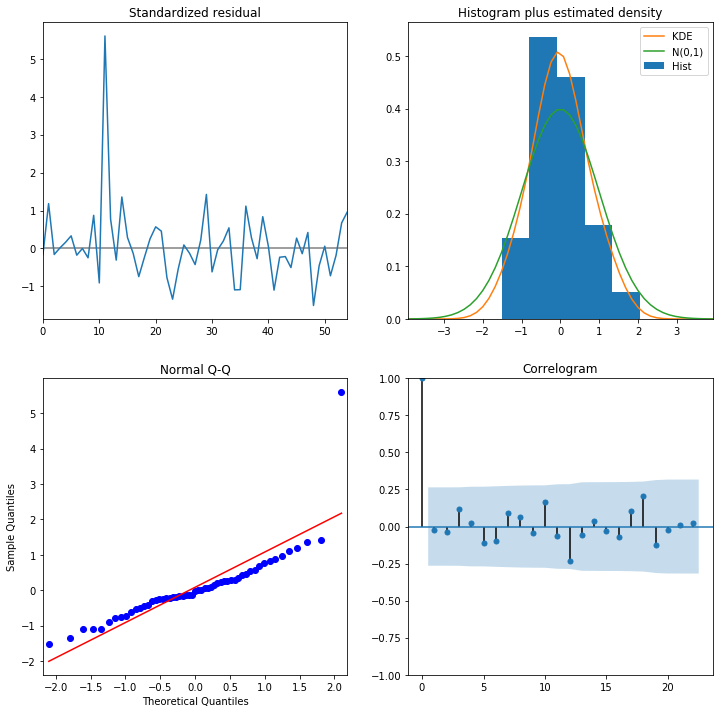

In [15]:
model.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

From the residuals plot, we see the outlier for January 1998.  Let's check for outliers.

In [16]:
%%capture
%run outlier_detection.py

In [17]:
lambda2, ind = detectAO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

indexes:  24
lambda2:  8.739118780102599


In [18]:
lambda1, ind = detectIO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda1)
else:
    print("No IO detected")

indexes:  24
lambda1:  9.083256500262593


Both $\hat{\lambda}_1$ and $\hat{\lambda}_2$ are significant at the 5% level for this residual.

**(c)**  We will fit the model with only the one IO residual detected:

In [19]:
xreg = np.zeros(len(Y))
xreg[24] = 1

model = ARIMA(np.log(Y), exog=xreg, order=(0, 1, 1), seasonal_order=(0, 1, 0, 12)).fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          airmiles   No. Observations:                   68
Model:             ARIMA(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 110.027
Date:                           Sun, 17 May 2020   AIC                           -214.055
Time:                                   19:24:47   BIC                           -208.033
Sample:                                        0   HQIC                          -211.726
                                            - 68                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0837      0.011      7.909      0.000       0.063       0.104
ma.L1         -0.3570      0.121     -2.961

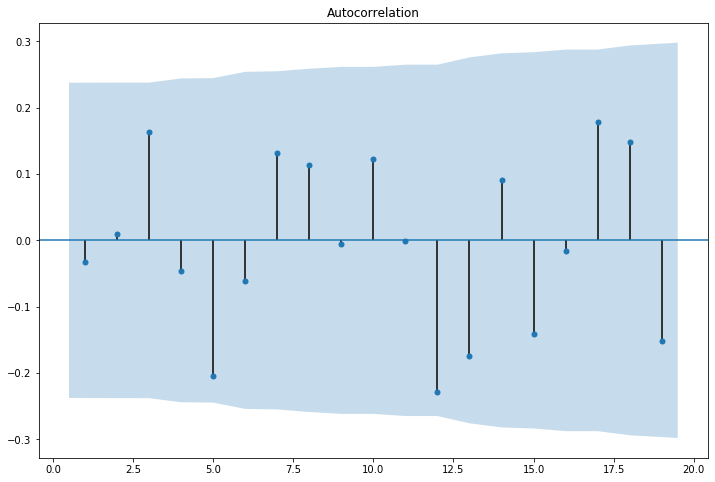

In [20]:
resid = model.filter_results.standardized_forecasts_error[0]

plt.figure(figsize=(12, 8))
plot_acf(resid, zero=False, ax=plt.gca())
plt.show()

ACF still indicates a potential autocorrelation at lag 12 (though `statsmodels`' default confidence ranges indicate it is fine, unlike R's diagnostics). Let's fit a better model in the next step.

**(d)**  We will now fit the model with $Q = 1$:

In [21]:
xreg = np.zeros(len(Y))
xreg[24] = 1

model = ARIMA(np.log(Y), exog=xreg, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()
print(model.summary())

                                    SARIMAX Results                                     
Dep. Variable:                         airmiles   No. Observations:                   68
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 111.898
Date:                          Sun, 17 May 2020   AIC                           -215.796
Time:                                  19:24:48   BIC                           -207.767
Sample:                                       0   HQIC                          -212.691
                                           - 68                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0853      0.011      7.474      0.000       0.063       0.108
ma.L1         -0.4043      0.119     -3.400      0.

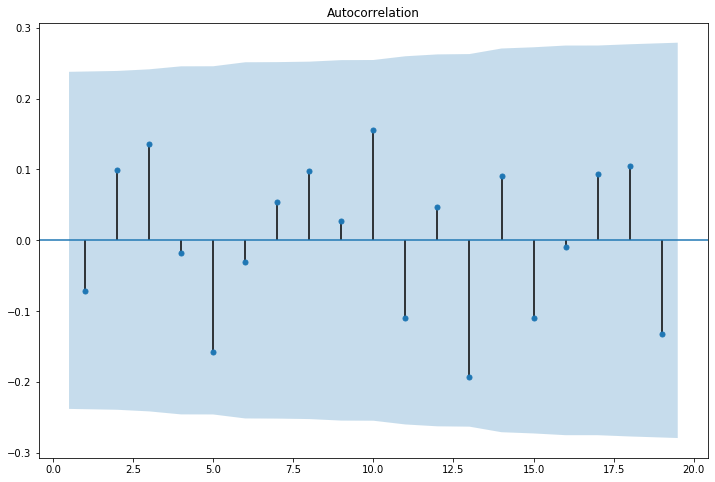

In [22]:
resid = model.filter_results.standardized_forecasts_error[0]

plt.figure(figsize=(12, 8))
plot_acf(resid, zero=False, ax=plt.gca())
plt.show()

The ACF for lag 12 is now gone -- though the ACF for lag 13 is now larger in magnitude.

**Exercise 11.16**.  Use the logarithms of the Denver region public transportation boardings and Denver gasoline price series.  The data are in the file named `boardings`.

**(a)** Display the time series plot of the monthly boardings using seasonal plotting symbols.  Interpret the plot.

**(b)** Display the time series plot of the monthly average gasoline prices using seasonal plotting symbols.  Interpret the plot.

**Solution**.

In [23]:
data = pd.read_csv('../data/boardings.dat', sep=' ')
data['date'] = pd.date_range('2000-08', periods=len(data), freq='M')

**(a)**

In [24]:
%%capture
%run utils.py

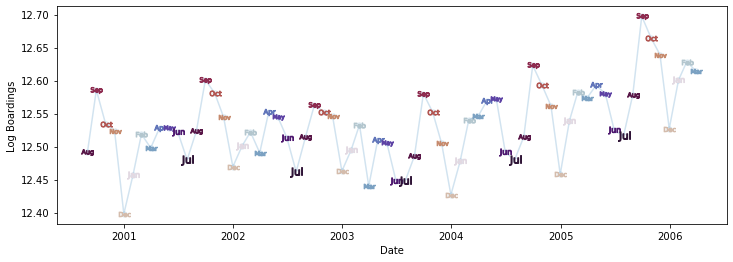

In [25]:
plot_monthly(data['date'], data['log.boardings'], 'Date', 'Log Boardings')

We see seasonality and some non-stationarity -- an apparent growth trend after 2004.

**(b)**

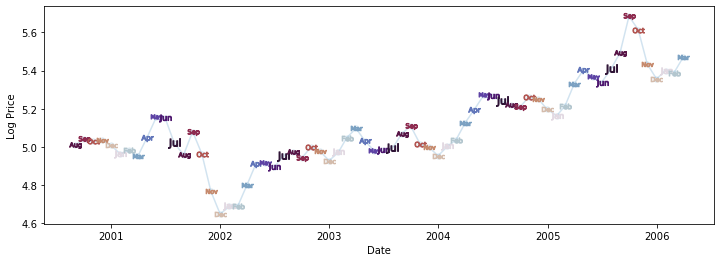

In [26]:
plot_monthly(data['date'], data['log.price'], 'Date', 'Log Price')

We see some seasonality, a growth trend, and some potential outliers.

**Exercise 11.17**.  The data file named `deere1` contains 82 consecutive values for the amount of deviation (in 0.000025 inch units) from a specified target value that an industrial machining process at Deere & Co. produced under certain specified operating conditions.  These data were first used in Exercise 6.33, page 146, where we observed an obvious outlier at time $t = 27$.

**(a)** Fit an AR(2) model using the original data including the outlier.

**(b)** Test the fitted AR(2) model of part (a) for both AO and IO outliers.

**(c)** Now fit the AR(2) model incorporating a term in the model for the outlier.

**(d)** Assess the fit of the model in part (c) using all of our diagnostic tools. In particular, compare the properties of this model with the one obtained in part (a).

**Solution**.

In [27]:
Y = pd.read_csv('../data/deere1.dat')['deere1']

**(a)**

In [28]:
model = ARIMA(Y, order=(2, 0, 0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 deere1   No. Observations:                   82
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -234.189
Date:                Sun, 17 May 2020   AIC                            476.378
Time:                        19:24:49   BIC                            486.005
Sample:                             0   HQIC                           480.243
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4140      0.918      1.540      0.124      -0.386       3.214
ar.L1          0.0269      0.206      0.131      0.896      -0.376       0.430
ar.L2          0.2392      0.233      1.027      0.3

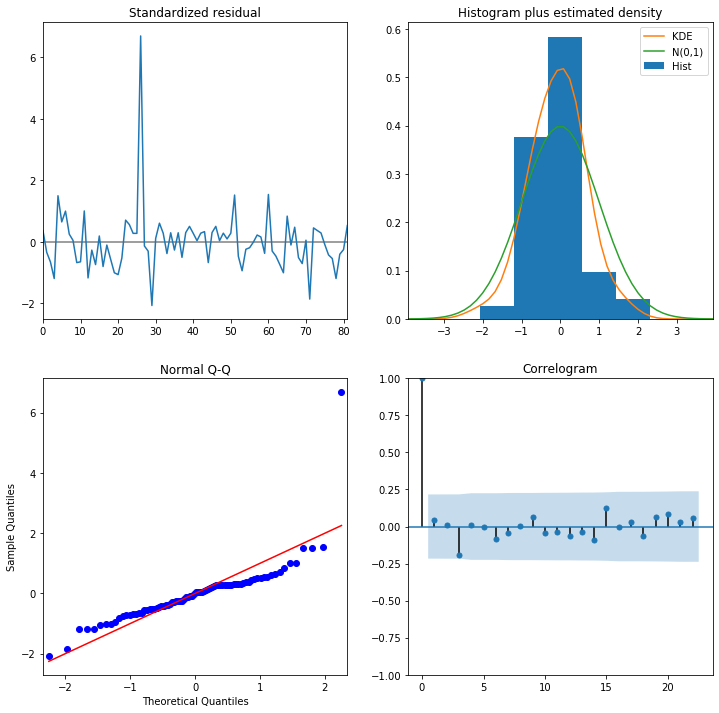

In [29]:
model.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

**(b)**

In [30]:
lambda2, ind = detectAO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

indexes:  26
lambda2:  8.668473262431396


In [31]:
lambda2, ind = detectIO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda2)
else:
    print("No IO detected")

indexes:  26
lambda1:  8.816393131695028


**(c and d)**

In [32]:
xreg = np.zeros(len(Y))
xreg[26] = 1

model = ARIMA(Y, exog=xreg, order=(2, 0, 0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 deere1   No. Observations:                   82
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -202.976
Date:                Sun, 17 May 2020   AIC                            415.952
Time:                        19:24:49   BIC                            427.985
Sample:                             0   HQIC                           420.783
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0849      0.418      2.593      0.010       0.265       1.905
x1            27.1757      4.584      5.929      0.000      18.192      36.160
ar.L1         -0.0143      0.110     -0.131      0.8

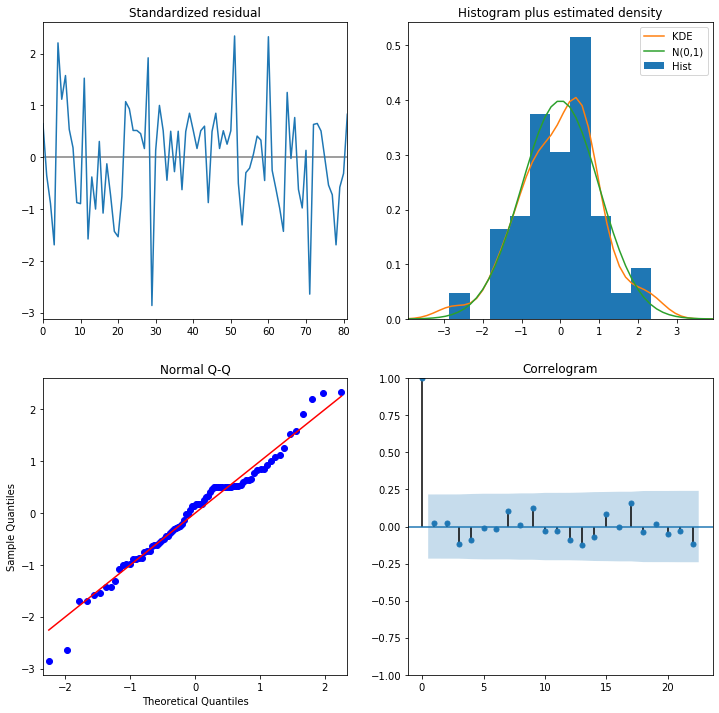

In [33]:
model.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

In [34]:
lambda2, ind = detectAO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

No AO detected


In [35]:
lambda1, ind = detectIO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda1)
else:
    print("No IO detected")

No IO detected


In [36]:
from scipy.stats import shapiro

In [37]:
W, p_value = shapiro(model.resid)
p_value

0.22568976879119873

Incorporating the outlier seems to remove the outlier from the detection criteria.  ACF plot still indicates no obvious significant correlations, and Shapiro-Wilk fails to reject normality on the residuals.

**Exercise 1.18**.  The data file named `days` contains accounting data from the Winegard Co. of Burlington, Iowa. The data are the number of days until Winegard receives payment for 130 consecutive orders from a particular distributor of Winegard products.  (The name of the distributor must remain anonymous for confidentiality reasons.)  These data were first investigated in Exercise 6.39, page 147, but several outliers were observed. When the observed outliers were replaced by more typical values, an MA(2) model was suggested.

**(a)** Fit an MA(2) model to the original data, and test the fitted model for both AO and IO outliers.

**(b)** Now fit the MA(2) model incorporating the outliers into the model.

**(c)** Assess the fit of the model obtained in part (b). In particular, are any more outliers indicated?

**(d)** Fit another MA(2) model incorporating any additional outliers found in part (c), and assess the fit of this model.

**Solution**.

In [38]:
Y = pd.read_csv('../data/days.dat')['days']

**(a)**

In [39]:
model = ARIMA(Y, order=(0, 0, 2)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                   days   No. Observations:                  130
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -440.477
Date:                Sun, 17 May 2020   AIC                            888.955
Time:                        19:24:50   BIC                            900.425
Sample:                             0   HQIC                           893.615
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6933      1.015     28.271      0.000      26.704      30.683
ma.L1          0.1113      0.102      1.087      0.277      -0.089       0.312
ma.L2          0.1557      0.109      1.431      0.1

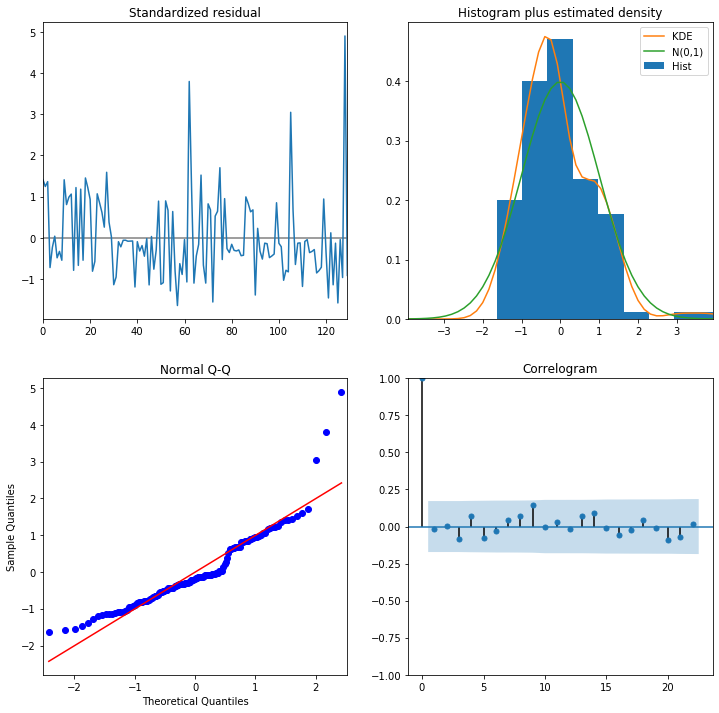

In [40]:
model.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

In [41]:
lambda2, ind = detectAO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

indexes:  [ 62 128]
lambda2:  [4.00951729 5.34428249]


In [42]:
lambda1, ind = detectIO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda1)
else:
    print("No IO detected")

indexes:  [ 62 128]
lambda1:  [4.08102594 5.2682712 ]


Two outliers were detected with $\hat{\lambda}_1$ and $\hat{\lambda}_2$ at the 5% significance level.

**(b)**

In [43]:
xreg = np.zeros((len(Y), 2))
xreg[62, 0] = 1
xreg[128:, 1] = 1

model = ARIMA(Y, exog=xreg, order=(0, 0, 2)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                   days   No. Observations:                  130
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -427.311
Date:                Sun, 17 May 2020   AIC                            866.622
Time:                        19:24:51   BIC                            883.827
Sample:                             0   HQIC                           873.613
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1897      0.851     33.109      0.000      26.521      29.858
x1            26.7636     33.203      0.806      0.420     -38.312      91.839
x2            16.7094      1.827      9.147      0.0

**(c and d)**

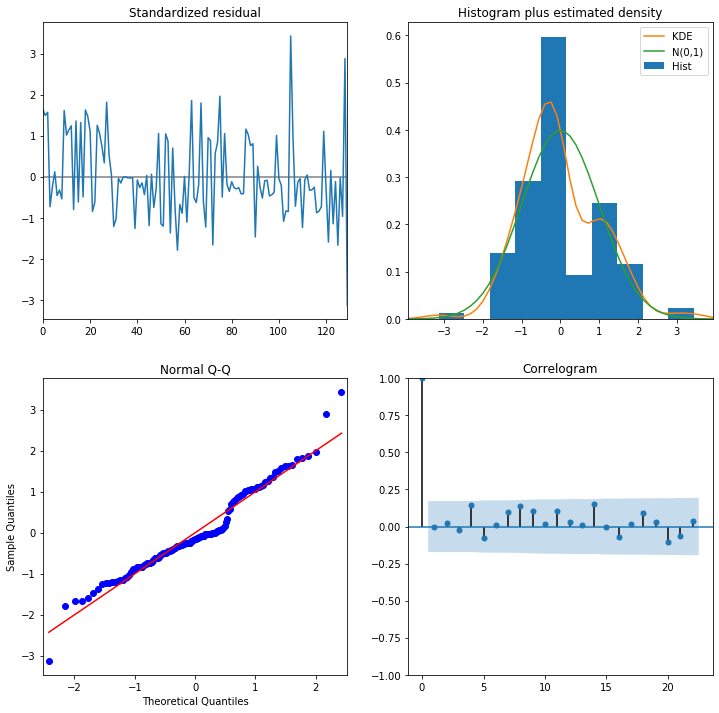

In [44]:
model.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

In [45]:
lambda2, ind = detectAO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

No AO detected


In [46]:
lambda1, ind = detectIO(model)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda1)
else:
    print("No IO detected")

No IO detected


No more outliers were detected.